In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

<h3>Кармазин Василий ПИН-43</h3>
<br><br>
<center>
    <h1>Лабораторная работа №2</h1>
    <h2>Моделирование проблем ракетостроения</h2>
</center>

<h3>Цель работы:</h3>
Составить модель реактивного движения многоступенчатой ракеты. Показать невозможность преодоления земного притяжения при использовании одноступенчатой ракеты.

<center>
    <h3>1. Одноступенчатая ракета.</h3>
</center>

<h4>Описание модели:</h4>
Одноступенчатая ракета массы $m_0$

В данной модели мы предполагаем, что:
- Нет сопротивления воздуха
- Действие внешних сил на ракету незначительно
- Скорость сгорания топлива постоянна
- Продукты сгорания покидают сопла с постоянной скоростью

<h4>Дано:</h4>

- $u = 3\ км/с$, скорость истечения сгорающего топлива
- $m_0 = 100\ т = 100000\ кг$, масса ракеты на старте
- $v_1 = 7.844\ м/с$, первая космическая скорость

In [64]:
u = 3
m_0 = 100
lamb = 0.1
v_1 = 7.844

<h4>Построение модели:</h4>

Максимальную скорость ракеты можно расчитать по формуле Циолковского

<center>
    $v=u\ln{\left(\dfrac{M_1}{M_2}\right)}$
</center>

- $M_1$ - начальная масса ($M_1 = m_p + m_s + m_t = m_0$)
- $M_2$ - конечная масса ($M_2 = m_p + m_s = m_0 - m_t$)
- $u$ - скорость истечения сгорающего топлива
- $m_p$ - полезная нагрузка
- $m_s$ - структурная масса
- $m_t$ - масса топлива ракеты

<center>
    $v=u\ln{\left(\dfrac{m_p + m_s + m_t}{m_p + m_s}\right)}=
    u\ln{\left(\dfrac{m_0}{m_0 - m_t}\right)}$
</center>

Найдём структурную масс ракеты, всю отсальную массу можно считать за топливом

<center>
    $\lambda=\dfrac{m_s}{m_0 - m_p}$
</center>

При $m_p = 0$, получаем

<center>
    $m_s=\lambda m_0$
</center>

In [65]:
m_s = lamb*m_0

def M_1():
    return m_0

def M_2(m_t):
    return m_0 - m_t
    
def V(m_t):
    return u*np.log(M_1()/M_2(m_t))

<h4>Проверка модели:</h4>

Построим график зависимости скорости ракеты от структурной массы

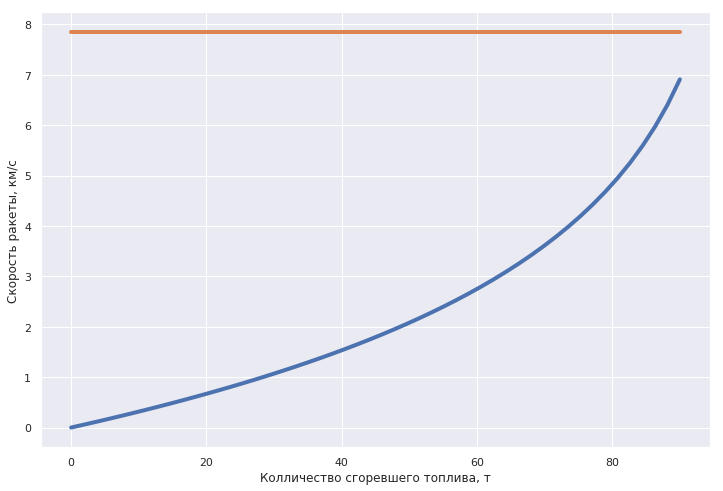

In [67]:
m_ts = np.linspace(0, m_0 - m_s)

plt.figure(figsize=(12,8))
plt.plot(m_ts, V(m_ts), linewidth=4);
plt.plot(m_ts, [v_1]*len(m_ts), linewidth=4)
plt.xlabel('Колличество сгоревшего топлива, т')
plt.ylabel('Скорость ракеты, км/с');

Одноступенчатая ракета, с такими параметрами не может достигнуть первой космической скорости

<center>
    <h3>2. Многоступенчатая ракета.</h3>
</center>

<h4>Описание модели:</h4>
Многоступенчатая ракета, с тремя ступенями массы $m_0=m_p+m_1+m_2+m_3$

В данной модели мы предполагаем, что:
- Нет сопротивления воздуха
- Действие внешних сил на ракету незначительно
- Скорость сгорания топлива постоянна
- Продукты сгорания покидают сопла с постоянной скоростью

<h4>Дано:</h4>

- $u = [2.25, 2.8, 2.8]\ км/с$, скорость истечения сгорающего топлива для $i$-го модуля
- $m_t = 4800 + 700 + 51.5\ т = 5751.5\ т$, масса топлива 3-х модулей
- $m_s = 700 + 70 + 22\ т = 792\ т$, сухой вес 3-х модулей
- $m_p = 56.5\ т $, полезная нагрузка
- $m_0 = m_t + m_p + m_s = 6400\ т$, масса ракеты на старте
- $v_1 = 7.844\ м/с$, первая космическая скорость

In [359]:
u = [2.25, 2.8, 2.8]
m_p = 56.5
v_1 = 7.844

<h4>Построение модели:</h4>

Формула Циолковского для многоступенчатой ракеты
<center>
$V=\sum _{i=1}^{N}u_{i}\cdot \ln \left({\frac {M_{p}+{\sum _{j=i}^{N}}M_{1j}}{M_{p}+M_{2i}-M_{1i}+{\sum _{j=i}^{N}}M_{1j}}}\right)$
</center>

- $M_{1i}$ — масса заправленной $i$-й ступени ракеты
- $M_{2i}$ — масса $i$-й ступени без топлива (структурная масса)
- $u_{i}$ — удельный импульс двигателя $i$-й ступени
- $M_{p}$ — масса полезной нагрузки
- $N$ — число ступеней ракеты.

Будем рассмтривать трёхступенчатую ракету предложенную фон Брауном

http://www.astronaut.ru/bookcase/books/ley/text/146.htm

С данными параметрами

| Ступень | $M_1$ | $M_2$ | $M_t$ |
| --- | --- | --- | --- |
| Первая ступень | 5500 | 700 | 4800 |
| Вторая ступень | 770 | 70 | 700 |
| Третья ступень | 73.5 | 22 | 51.5 |

In [384]:
M = np.array([[5500, 700],
              [770, 70],
              [73.5, 22]])
M_t = [4800, 700, 51.5]

Для 3-х ступенчатой ракеты получим
<center>
$V=\sum _{i=1}^{3}u_{i}\cdot \ln \left({\frac {M_{p}+{\sum _{j=i}^{3}}M_{1j}}{M_{p}+M_{2i}-M_{1i}+{\sum _{j=i}^{3}}M_{1j}}}\right)$
</center>

Введём сокращения, пусть

$ М_{i_{all}} = M_p + \sum_{j=i}^{3}M_{1j}$, общая масса до $i$-й ступени ракеты

$\delta M_i = M_{2i}-M_{1i}$, масса топлива $i$-й ступени

Тогда получаем 

<center>
$V=\sum _{i=1}^{3}u_{i}\cdot \ln \left({\frac {М_{1_{all}}}{\delta M_i+М_{1_{all}}}}\right)$
</center>

In [408]:
def M_all(i):
    return m_p + sum(M[i:,0])

def one_V(m_t, i):
    return u[i]*np.log(M_all(i)/(M_all(i) - m_t))

def V(m_t):
    m_t_splited = []
    for i in range(len(M)):
        if m_t < 0:
            break
        if m_t > M_t[i]:
            m_t -= M_t[i]
            m_t_splited.append(M_t[i])
        else:
            m_t_splited.append(m_t)
            m_t -= M_t[i]
    return sum([one_V(m_t, i) for i, m_t in enumerate(m_t_splited)])

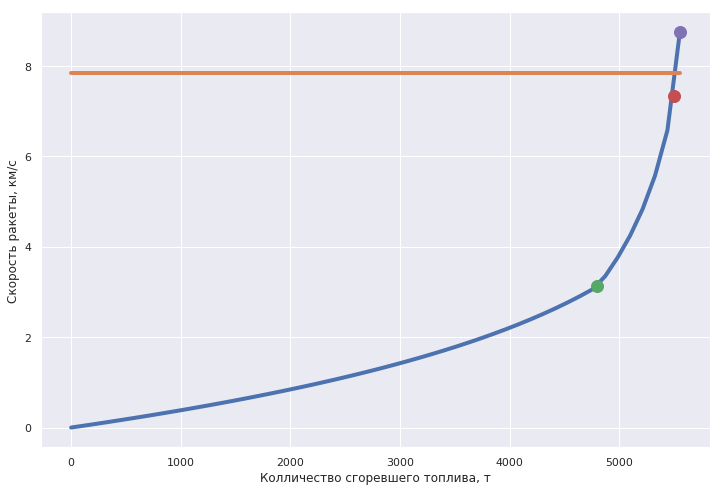

In [416]:
m_ts = np.linspace(0, sum(M_t))

plt.figure(figsize=(12,8))
plt.plot(m_ts, [V(i) for i in m_ts], linewidth=4);
plt.plot(m_ts, [v_1]*len(m_ts), linewidth=4)

for i in range(len(M_t)):
    m_val = sum(M_t[:i+1])
    plt.plot([m_val], [V(m_val)], linewidth=12, 
             marker='o',  markersize=12)
    
plt.xlabel('Колличество сгоревшего топлива, т')
plt.ylabel('Скорость ракеты, км/с');

Трёхступенчатая ракета данной конфигурации, может выйти на орбиту преодалев первую космическую скорость